# Decision Trees_Classfication

#### **Import Libarary**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import sklearn.model_selection as skm

from statsmodels.datasets import get_rdataset
from ISLP import load_data, confusion_table
from ISLP.models import ModelSpec as MS

**libararies required for tree-based model**

In [2]:
# Decision_Trees
from sklearn.tree import (DecisionTreeClassifier as DTC,
                          DecisionTreeRegressor as DTR,
                          plot_tree,
                          export_text)

# Ensemble-based models
from sklearn.ensemble import ( RandomForestRegressor as RF,
                              GradientBoostingRegressor as GBR)

# BART model
from ISLP.bart import BART

# Metrics
from sklearn.metrics import (accuracy_score,
                             log_loss)

#### **Import data** 

**"Carseats" from libarary ISLP**

**This dataset includes 10 predictors and 1 target variable ("Sales").**

In [3]:
Carseats=load_data("Carseats")
Carseats

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


**We want to predict if the sales is high or low.**


**In this data set "Sales" is a continous value, we need to record it as a dummy variable**

In [4]:
High=np.where(Carseats.Sales >  8, "Yes", "No")


#### **Create a model in order to predict "High" using all 10 predictors.**

In [5]:
model=MS(Carseats.columns.drop("Sales"), intercept=False)

#### **Convert all qualitative variables to binary variables**

For instance, ShelveLoc originally includes three values: Good, Medium, and Bad. We create two binary variables to represent ShelveLoc: ShelveLoc[Good] and ShelveLoc[Medium]. If an observation has a 'Bad' value for ShelveLoc, then both ShelveLoc[Good] and ShelveLoc[Medium] should be 0.

In [6]:
D=model.fit_transform(Carseats)
feature_names = list(D.columns)
print("name of features:", feature_names)
D

name of features: ['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'ShelveLoc[Good]', 'ShelveLoc[Medium]', 'Age', 'Education', 'Urban[Yes]', 'US[Yes]']


,CompPrice,Income,Advertising,Population,Price,ShelveLoc[Good],ShelveLoc[Medium],Age,Education,Urban[Yes],US[Yes]
0,138,73,11,276,120,0.0,0.0,42,17,1.0,1.0
1,111,48,16,260,83,1.0,0.0,65,10,1.0,1.0
2,113,35,10,269,80,0.0,1.0,59,12,1.0,1.0
3,117,100,4,466,97,0.0,1.0,55,14,1.0,1.0
4,141,64,3,340,128,0.0,0.0,38,13,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1.0,0.0,33,14,1.0,1.0
396,139,23,3,37,120,0.0,1.0,55,11,0.0,1.0
397,162,26,12,368,159,0.0,1.0,40,18,1.0,1.0
398,100,79,7,284,95,0.0,0.0,50,12,1.0,1.0


#### **Creating Input Data: X**

**In order to fit a decision tree classifier using "Sklearn", X should be an array**

In [7]:
X=np.asarray(D)
X

array([[138.,  73.,  11., ...,  17.,   1.,   1.],
       [111.,  48.,  16., ...,  10.,   1.,   1.],
       [113.,  35.,  10., ...,  12.,   1.,   1.],
       ...,
       [162.,  26.,  12., ...,  18.,   1.,   1.],
       [100.,  79.,   7., ...,  12.,   1.,   1.],
       [134.,  37.,   0., ...,  16.,   1.,   1.]])

#### **Define and fit a Decision Tree Classifier on Data**

**Features:**
1. **criterion**: The criterion parameter determines the function used to evaluate the quality of a split in the decision tree. The primary choices are:

- Gini Impurity: Used by default, it measures how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset. Gini aims to maximize the purity of nodes.
- Entropy (or Information Gain): Entropy is a measure of the randomness in the information being processed. The higher the entropy, the harder it is to draw any conclusions from that information. Trees using entropy aim to reduce the level of entropy in the nodes.

2. **max_depth**: The max_depth parameter controls the maximum number of levels in the tree (depth of the tree). Limiting the depth of a tree helps to prevent overfitting as deeper trees can fit more details but might capture noise in the training data. Shallower trees result in broader generalizations.

3. **random_state**: This parameter controls the randomness of the estimators. It is used for initializing the internal random number generator, which decides the split at each node. Consistent use of random_state allows you to make your results reproducible as it ensures that the splits across multiple runs are consistent.

4. **min_samples_split**: This parameter defines the minimum number of observations a node must have before it can be split. Higher values prevent the model from learning overly specific patterns, thus reducing overfitting. Lower values allow the tree to make more specific groupings.

In [8]:
Classifier_Tree_1=DTC( criterion='entropy',
               max_depth=3,
               random_state=0)

#Fit the classifier on data
Classifier_Tree_1.fit(X, High)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

#### **Report results and Plot the Tree**

[Text(0.5, 0.875, 'ShelveLoc[Good] <= 0.5\nentropy = 0.977\nsamples = 400\nvalue = [236, 164]'),
 Text(0.25, 0.625, 'Price <= 92.5\nentropy = 0.894\nsamples = 315\nvalue = [217, 98]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'Income <= 57.0\nentropy = 0.887\nsamples = 46\nvalue = [14, 32]'),
 Text(0.0625, 0.125, 'entropy = 0.881\nsamples = 10\nvalue = [7, 3]'),
 Text(0.1875, 0.125, 'entropy = 0.711\nsamples = 36\nvalue = [7, 29]'),
 Text(0.375, 0.375, 'Advertising <= 13.5\nentropy = 0.804\nsamples = 269\nvalue = [203, 66]'),
 Text(0.3125, 0.125, 'entropy = 0.687\nsamples = 224\nvalue = [183, 41]'),
 Text(0.4375, 0.125, 'entropy = 0.991\nsamples = 45\nvalue = [20, 25]'),
 Text(0.75, 0.625, 'Price <= 135.0\nentropy = 0.767\nsamples = 85\nvalue = [19, 66]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'US[Yes] <= 0.5\nentropy = 0.523\nsamples = 68\nvalue = [8, 60]'),
 Text(0.5625, 0.125, 'entropy = 0.937\nsamples = 17\nvalue = [6, 11]'),
 Text(0.6875, 0.125, 'entropy = 0.

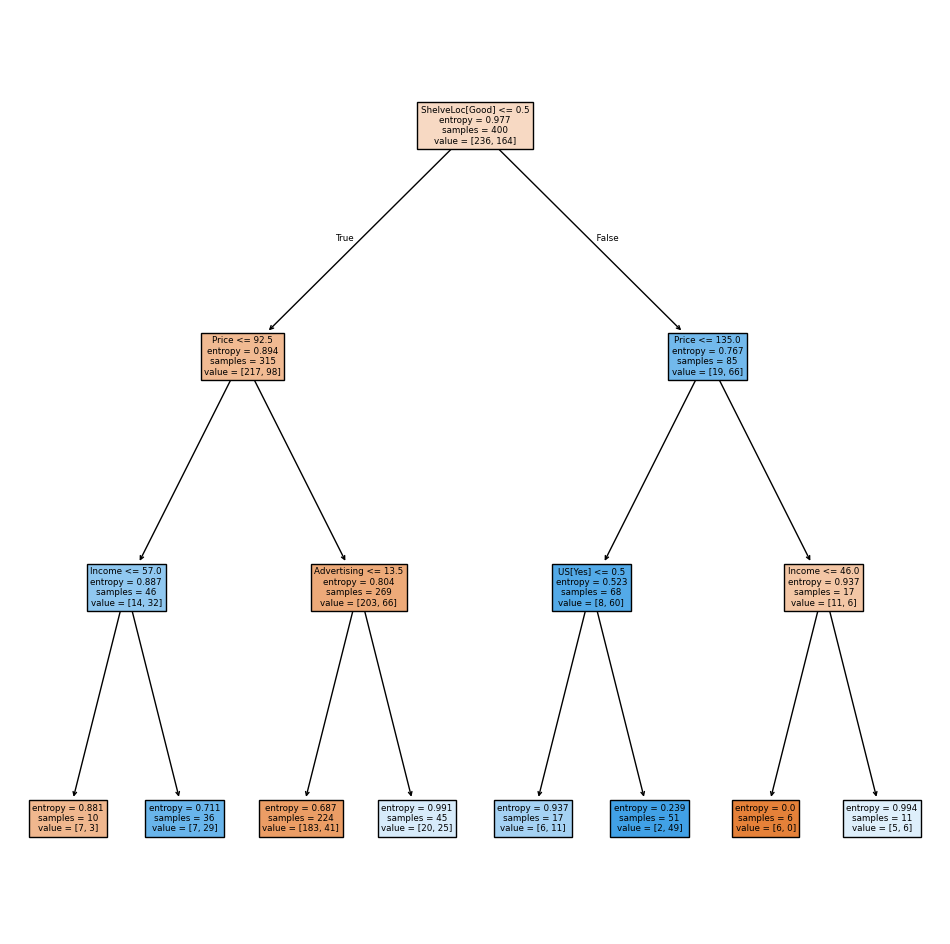

In [9]:
plt.figure(figsize=(12,12))
plot_tree(Classifier_Tree_1 , filled=True, feature_names=feature_names )

In [10]:
print(export_text(Classifier_Tree_1, feature_names=feature_names, show_weights=True))

|--- ShelveLoc[Good] <= 0.50
|   |--- Price <= 92.50
|   |   |--- Income <= 57.00
|   |   |   |--- weights: [7.00, 3.00] class: No
|   |   |--- Income >  57.00
|   |   |   |--- weights: [7.00, 29.00] class: Yes
|   |--- Price >  92.50
|   |   |--- Advertising <= 13.50
|   |   |   |--- weights: [183.00, 41.00] class: No
|   |   |--- Advertising >  13.50
|   |   |   |--- weights: [20.00, 25.00] class: Yes
|--- ShelveLoc[Good] >  0.50
|   |--- Price <= 135.00
|   |   |--- US[Yes] <= 0.50
|   |   |   |--- weights: [6.00, 11.00] class: Yes
|   |   |--- US[Yes] >  0.50
|   |   |   |--- weights: [2.00, 49.00] class: Yes
|   |--- Price >  135.00
|   |   |--- Income <= 46.00
|   |   |   |--- weights: [6.00, 0.00] class: No
|   |   |--- Income >  46.00
|   |   |   |--- weights: [5.00, 6.00] class: Yes



#### **Training Meseasurement Metrics**

##### 1. **Accuracy and Training Error**

In [11]:
Accuracy_1=accuracy_score(High , Classifier_Tree_1.predict(X))
Training_Error_1=1-Accuracy_1

print("Model DTC:\nAccuracy:", Accuracy_1, "\nTraining Error:", round(Training_Error_1, 2))


Model DTC:
Accuracy: 0.79 
Training Error: 0.21


##### 2. **Deviance (Cross_entropy or logloss):**


$$-2 \sum_{m=0}^{k} n_{mk} \log \hat{p}_{mk}$$

- n_{mk} : number of observations in the mth terminal node that belong to the kth class.

A small deviance indicates a tree that provides a good fit to the (training) data

In [12]:
resid_dev = np.sum(log_loss(High ,  Classifier_Tree_1.predict_proba(X)))
print("Model DTC\nDeviance:", round(resid_dev,2))

Model DTC
Deviance: 0.47


#### **Performance Metrics_ Validation**

**skm.ShuffleSplit**:This is a cross-validation technique that randomly shuffles and splits the data into training and testing sets. It can be used for tasks like validation and model evaluation.

**n_splits**:  This specifies the number of re-shuffling & splitting iterations to be performed. Here, n_splits=1 means that the data will be split into training and test sets only once.

In [13]:
validation= skm.ShuffleSplit(n_splits=1,
                             test_size=200,
                             random_state=0)

results=skm.cross_validate(Classifier_Tree_1, D, High, cv=validation)

test_score= results['test_score']
print('Model DTC\ntest score:', test_score.item())

Model DTC
test score: 0.685


#### **Prunning_Tree**

##### 1. **Create a whole tree on the training set**


- **Train_test_split**: is used to split arrays or matrices into random train and test subsets. It's a common method used in machine learning to evaluate models
- **Test_size**: This specifies the proportion of the dataset to include in the test split. Here, test_size=0.5 means that 50% of the data will go into the test set, and the remaining 50% will go into the training set.

In [14]:
(X_train , X_test , High_train , High_test) = skm.train_test_split(X, High , test_size=0.5, random_state=0)

In [15]:
Classifier_Tree_Prunning_1= DTC(criterion='entropy', random_state=0)
Classifier_Tree_Prunning_1.fit(X_train , High_train)

test_accuracy_2= accuracy_score(High_test , Classifier_Tree_Prunning_1.predict(X_test))

print("Model DTC_Prunning", "\nAccuracy:", test_accuracy_2)

Model DTC_Prunning 
Accuracy: 0.735


##### 2. **Extract cost-complexity values**

- **Cost-Complexity Pruning**: This is a method for pruning decision trees. It works by adding a penalty for tree complexity to the error of the tree. The goal is to find the optimal balance between the complexity of the tree and its accuracy on the training data.

- **cost_complexity_pruning_path() Method**:The cost_complexity_pruning_path() method of a decision tree classifier is used to compute the cost-complexity pruning path for the decision tree. This path contains a sequence of possible prunings, along with the corresponding effective alpha values (which control the pruning strength).

- **Returns**: The method returns a dictionary that includes:
        a. ccp_alphas: Array of effective alpha values, where each value corresponds to a subtree in the pruning sequence.
        b. impurities: The total impurity (a measure of misclassification) of the leaves in the tree at each alpha value.

In [16]:
ccp_path = Classifier_Tree_Prunning_1.cost_complexity_pruning_path(X_train , High_train)
ccp_path

{'ccp_alphas': array([0.        , 0.01622556, 0.0171946 , 0.0180482 , 0.0180482 ,
        0.01991688, 0.02012073, 0.02070855, 0.02193427, 0.0219518 ,
        0.02220877, 0.02274806, 0.02417233, 0.02588672, 0.02714959,
        0.02735525, 0.02900052, 0.02906078, 0.03209543, 0.04499252,
        0.06236632, 0.10024835]),
 'impurities': array([0.        , 0.01622556, 0.05061477, 0.06866297, 0.08671117,
        0.12654492, 0.14666566, 0.16737421, 0.18930848, 0.21126028,
        0.25567782, 0.27842588, 0.32677055, 0.35265727, 0.43410604,
        0.54352706, 0.57252758, 0.65970991, 0.72390076, 0.8138858 ,
        0.87625212, 0.97650047])}

##### 3. **Cross-Validation Training Error to find alpha values**

**3.1. define K-fold cross validation:**

shuffle=True: Before splitting the data into folds, the data is shuffled randomly. This ensures that each fold is representative of the entire dataset.

In [17]:
kfold = skm.KFold(10, random_state=1, shuffle=True)

**3.2. Grid Search by "skm.GridSearchCV":**
- Purpose: Grid Search is a technique for finding the best hyperparameters for a model. It works by exhaustively searching through a specified grid of hyperparameters and evaluating the model's performance for each combination using cross-validation.

- refit=True: Once GridSearchCV finds the best hyperparameter (in this case, the best ccp_alpha), it will automatically refit the model on the entire training dataset using this best parameter.

- scoring= 'accuracy': This specifies the metric used to evaluate the model's performance. Here, it's set to 'accuracy', meaning that GridSearchCV will choose the ccp_alpha that maximizes the accuracy of the model.

In [18]:
grid = skm.GridSearchCV(Classifier_Tree_Prunning_1,
{'ccp_alpha': ccp_path.ccp_alphas},
refit=True ,    
cv=kfold ,
scoring='accuracy')


**3.3. fit the data to Grid:** it fits the model using the best hyperparameters found through grid search.

In [19]:
grid.fit(X_train , High_train)


GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=0),
             param_grid={'ccp_alpha': array([0.        , 0.01622556, 0.0171946 , 0.0180482 , 0.0180482 ,
       0.01991688, 0.02012073, 0.02070855, 0.02193427, 0.0219518 ,
       0.02220877, 0.02274806, 0.02417233, 0.02588672, 0.02714959,
       0.02735525, 0.02900052, 0.02906078, 0.03209543, 0.04499252,
       0.06236632, 0.10024835])},
             scoring='accuracy')


**3.4. Evaluate the Best Model:**
grid.best_score_ gives you the highest accuracy achieved by the model during the grid search. This tells you how well the best pruned tree performs in cross-validation.

In [20]:
grid.best_score_

0.685

##### 4. **plot the prunned tree**

Number of level (terminal nodes) of prunned tree 30
Cross-Validation Accuracy on Training data: 0.685


[Text(0.4345703125, 0.95, 'Price <= 94.5\nentropy = 0.977\nsamples = 200\nvalue = [118, 82]'),
 Text(0.1875, 0.85, 'CompPrice <= 118.5\nentropy = 0.769\nsamples = 40\nvalue = [9, 31]'),
 Text(0.31103515625, 0.8999999999999999, 'True  '),
 Text(0.15625, 0.75, 'Price <= 86.5\nentropy = 0.894\nsamples = 29\nvalue = [9, 20]'),
 Text(0.09375, 0.65, 'Income <= 60.0\nentropy = 0.523\nsamples = 17\nvalue = [2, 15]'),
 Text(0.0625, 0.55, 'Advertising <= 5.0\nentropy = 0.971\nsamples = 5\nvalue = [2, 3]'),
 Text(0.03125, 0.45, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.09375, 0.45, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.125, 0.55, 'entropy = 0.0\nsamples = 12\nvalue = [0, 12]'),
 Text(0.21875, 0.65, 'Population <= 212.5\nentropy = 0.98\nsamples = 12\nvalue = [7, 5]'),
 Text(0.1875, 0.55, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.25, 0.55, 'Income <= 36.5\nentropy = 0.954\nsamples = 8\nvalue = [3, 5]'),
 Text(0.21875, 0.45, 'entropy = 0.0\nsamples = 3\nval

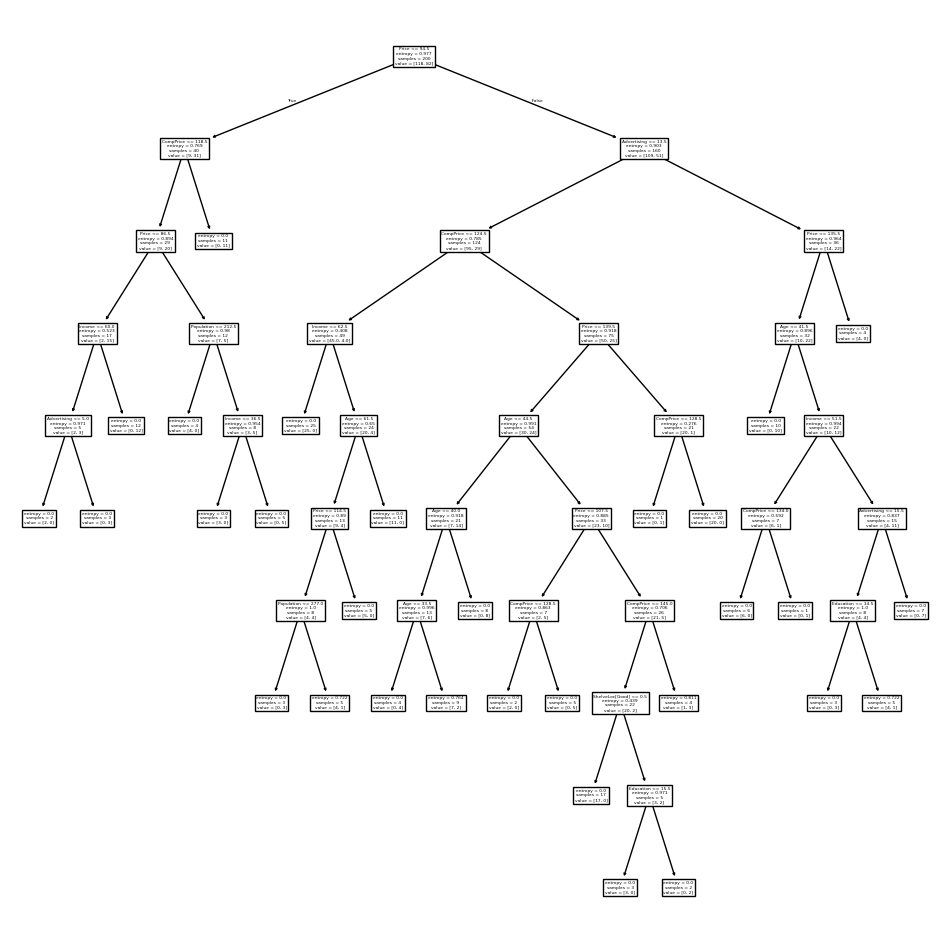

In [21]:
plt.figure(figsize=(12,12))
best_ = grid.best_estimator_
print('Number of level (terminal nodes) of prunned tree',  best_.tree_.n_leaves)
print('Cross-Validation Accuracy on Training data:',  grid.best_score_)
plot_tree(best_ , feature_names=feature_names)

##### 5. **Test Performance of Prunned Tree**

In [22]:
test_accuracy_prunned=accuracy_score(High_test, best_.predict(X_test))

print('MOdel DTC-prunned\n\nPerformance Accuracy:', test_accuracy_prunned)

confusion=confusion_table(best_.predict(X_test), High_test)
print("\nConfusion Table:\n", confusion)

MOdel DTC-prunned

Performance Accuracy: 0.72

Confusion Table:
 Truth      No  Yes
Predicted         
No         94   32
Yes        24   50
